In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import seaborn as sns

In [71]:
csv_data = pd.read_csv("C:\Test\country.csv", thousands = ',',encoding='cp949', skiprows = 1)
csv_data.head()

,지역,국가,운항(편),여객(명),화물(톤)
0,전체 합계,NaN,91714,9815393,1658148
1,일본,일본,12044,1541437,147108
2,중국,중국,9784,203239,217587
3,소계:아시아,NaN,33231,4473827,487265
4,아시아,네팔,97,10627,965


In [72]:
csv_data

,지역,국가,운항(편),여객(명),화물(톤)
0,전체 합계,NaN,91714,9815393,1658148
1,일본,일본,12044,1541437,147108
2,중국,중국,9784,203239,217587
3,소계:아시아,NaN,33231,4473827,487265
4,아시아,네팔,97,10627,965
...,...,...,...,...,...
68,기타,이스라엘,5,606,60
69,기타,이집트,0,0,0
70,기타,카타르,574,115146,27093
71,기타,케냐,0,0,0


In [73]:
new_data = csv_data.dropna(axis=0)
new_data

,지역,국가,운항(편),여객(명),화물(톤)
1,일본,일본,12044,1541437,147108
2,중국,중국,9784,203239,217587
4,아시아,네팔,97,10627,965
5,아시아,대만,3003,138595,50519
6,아시아,라오스,244,28909,702
...,...,...,...,...,...
68,기타,이스라엘,5,606,60
69,기타,이집트,0,0,0
70,기타,카타르,574,115146,27093
71,기타,케냐,0,0,0


In [74]:
new_data['counter'] = 1
group = new_data.groupby(new_data['지역'])['counter', '운항(편)', '여객(명)'].sum().reset_index()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_3572\3840025253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['counter'] = 1
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3572\3840025253.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = new_data.groupby(new_data['지역'])['counter', '운항(편)', '여객(명)'].sum().reset_index()


In [75]:
group

,지역,counter,운항(편),여객(명)
0,기타,12,1684,386737
1,대양주,5,3540,589456
2,미주,4,22369,1633506
3,아시아,18,33231,4473827
4,유럽,26,9062,987191
5,일본,1,12044,1541437
6,중국,1,9784,203239


In [76]:
hap = group.loc[[3,5,6]].sum()
hap

지역         아시아일본중국
counter         20
운항(편)        55059
여객(명)      6218503
dtype: object

In [77]:
group.drop([3,5,6], axis = 0, inplace = True)

In [78]:
group.loc['3'] = ['아시아', 20,55059, 6218503]

In [79]:
group

,지역,counter,운항(편),여객(명)
0,기타,12,1684,386737
1,대양주,5,3540,589456
2,미주,4,22369,1633506
4,유럽,26,9062,987191
3,아시아,20,55059,6218503


<function matplotlib.pyplot.show(close=None, block=None)>

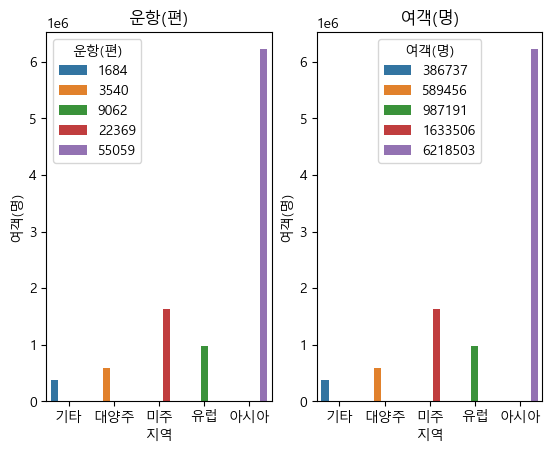

In [80]:
plt.subplot(1,2,1)
sns.barplot(data = group, x = "지역", y= "여객(명)", hue="운항(편)")
plt.title('운항(편)')
plt.subplot(1,2,2)
sns.barplot(data = group, x = "지역", y= "여객(명)", hue="여객(명)")
plt.title('여객(명)')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

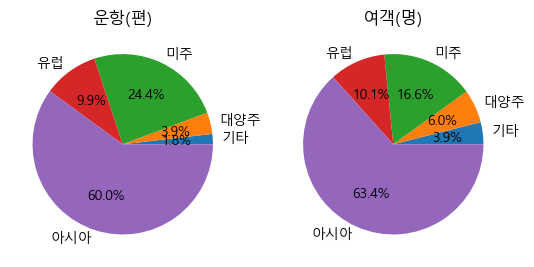

In [81]:

plt.subplot(1,2,1)
plt.pie(group['운항(편)'], labels=group['지역'], autopct='%.1f%%')
plt.title('운항(편)')
plt.subplot(1,2,2)
plt.pie(group['여객(명)'], labels=group['지역'], autopct='%.1f%%')
plt.title('여객(명)')
plt.show

In [82]:
# !pip install pywaffle -q

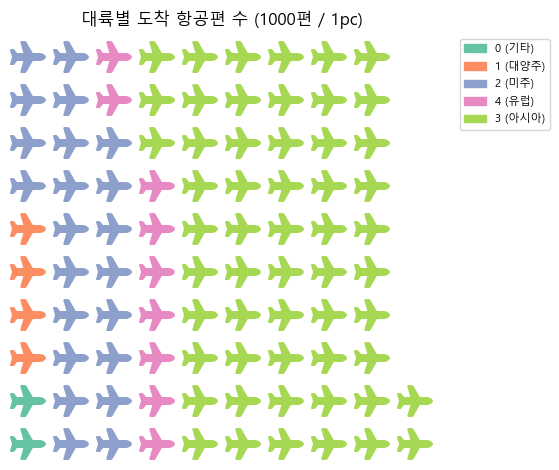

In [83]:
from pywaffle import Waffle

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        111: {
            'values': (group['운항(편)']/1000),
            'labels': ["{0} ({1})".format(n, v) for n, v in group['지역'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': '대륙별 도착 항공편 수 (1000편 / 1pc)', 'loc': 'center'}
        }
    },
    rows=10, icons = 'plane')

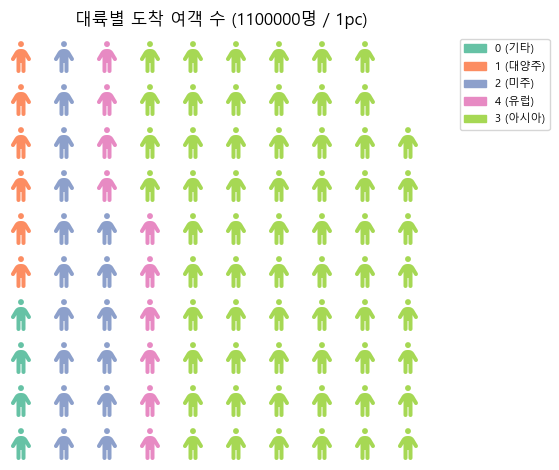

In [84]:
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        111: {
            'values': (group['여객(명)']/100000),
            'labels': ["{0} ({1})".format(n, v) for n, v in group['지역'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': '대륙별 도착 여객 수 (1100000명 / 1pc)', 'loc': 'center'}
        }
    },
    rows=10, icons = 'person')

### --------------------------------------------------------------------------------------------------

In [8]:
csv_data = pd.read_csv("C:\Test\country.csv", thousands = ',',encoding='cp949', skiprows = 1)
csv_data.head()

,지역,국가,운항(편),여객(명),화물(톤)
0,전체 합계,NaN,91714,9815393,1658148
1,일본,일본,12044,1541437,147108
2,중국,중국,9784,203239,217587
3,소계:아시아,NaN,33231,4473827,487265
4,아시아,네팔,97,10627,965


In [9]:
csv_data

,지역,국가,운항(편),여객(명),화물(톤)
0,전체 합계,NaN,91714,9815393,1658148
1,일본,일본,12044,1541437,147108
2,중국,중국,9784,203239,217587
3,소계:아시아,NaN,33231,4473827,487265
4,아시아,네팔,97,10627,965
...,...,...,...,...,...
68,기타,이스라엘,5,606,60
69,기타,이집트,0,0,0
70,기타,카타르,574,115146,27093
71,기타,케냐,0,0,0


In [10]:
new_data = csv_data.dropna(axis=0)
new_data

,지역,국가,운항(편),여객(명),화물(톤)
1,일본,일본,12044,1541437,147108
2,중국,중국,9784,203239,217587
4,아시아,네팔,97,10627,965
5,아시아,대만,3003,138595,50519
6,아시아,라오스,244,28909,702
...,...,...,...,...,...
68,기타,이스라엘,5,606,60
69,기타,이집트,0,0,0
70,기타,카타르,574,115146,27093
71,기타,케냐,0,0,0


In [11]:
new_data = new_data.drop([1,2], axis = 0)
new_data

,지역,국가,운항(편),여객(명),화물(톤)
4,아시아,네팔,97,10627,965
5,아시아,대만,3003,138595,50519
6,아시아,라오스,244,28909,702
7,아시아,말레이시아,1726,174841,29288
8,아시아,몽골,1084,146930,8910
...,...,...,...,...,...
68,기타,이스라엘,5,606,60
69,기타,이집트,0,0,0
70,기타,카타르,574,115146,27093
71,기타,케냐,0,0,0


In [12]:
new_data.loc['1'] = ['아시아', '일본', 12044, 1541437, 147108]
new_data.loc['2'] = ['아시아', '중국', 9784, 203239, 217587]

In [13]:
new_data

,지역,국가,운항(편),여객(명),화물(톤)
4,아시아,네팔,97,10627,965
5,아시아,대만,3003,138595,50519
6,아시아,라오스,244,28909,702
7,아시아,말레이시아,1726,174841,29288
8,아시아,몽골,1084,146930,8910
...,...,...,...,...,...
70,기타,카타르,574,115146,27093
71,기타,케냐,0,0,0
72,기타,한국,63,9086,9
1,아시아,일본,12044,1541437,147108


<function matplotlib.pyplot.show(close=None, block=None)>

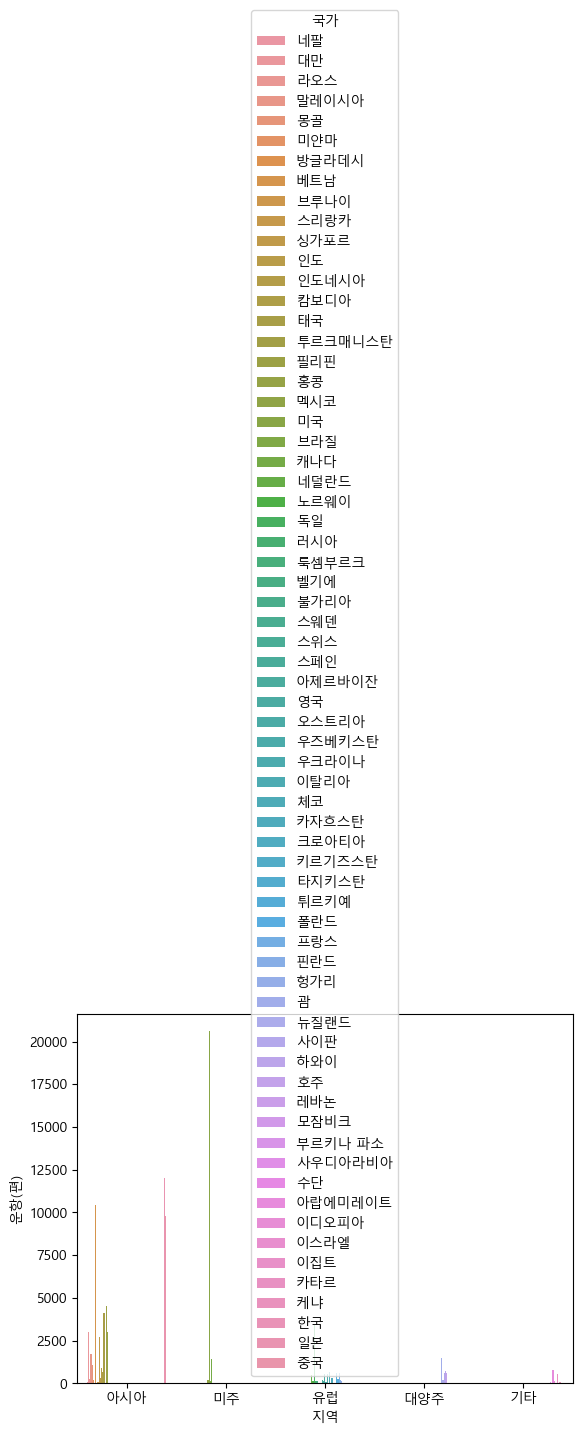

In [39]:
sns.barplot(x="지역", y="운항(편)", data=new_data, hue='국가')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

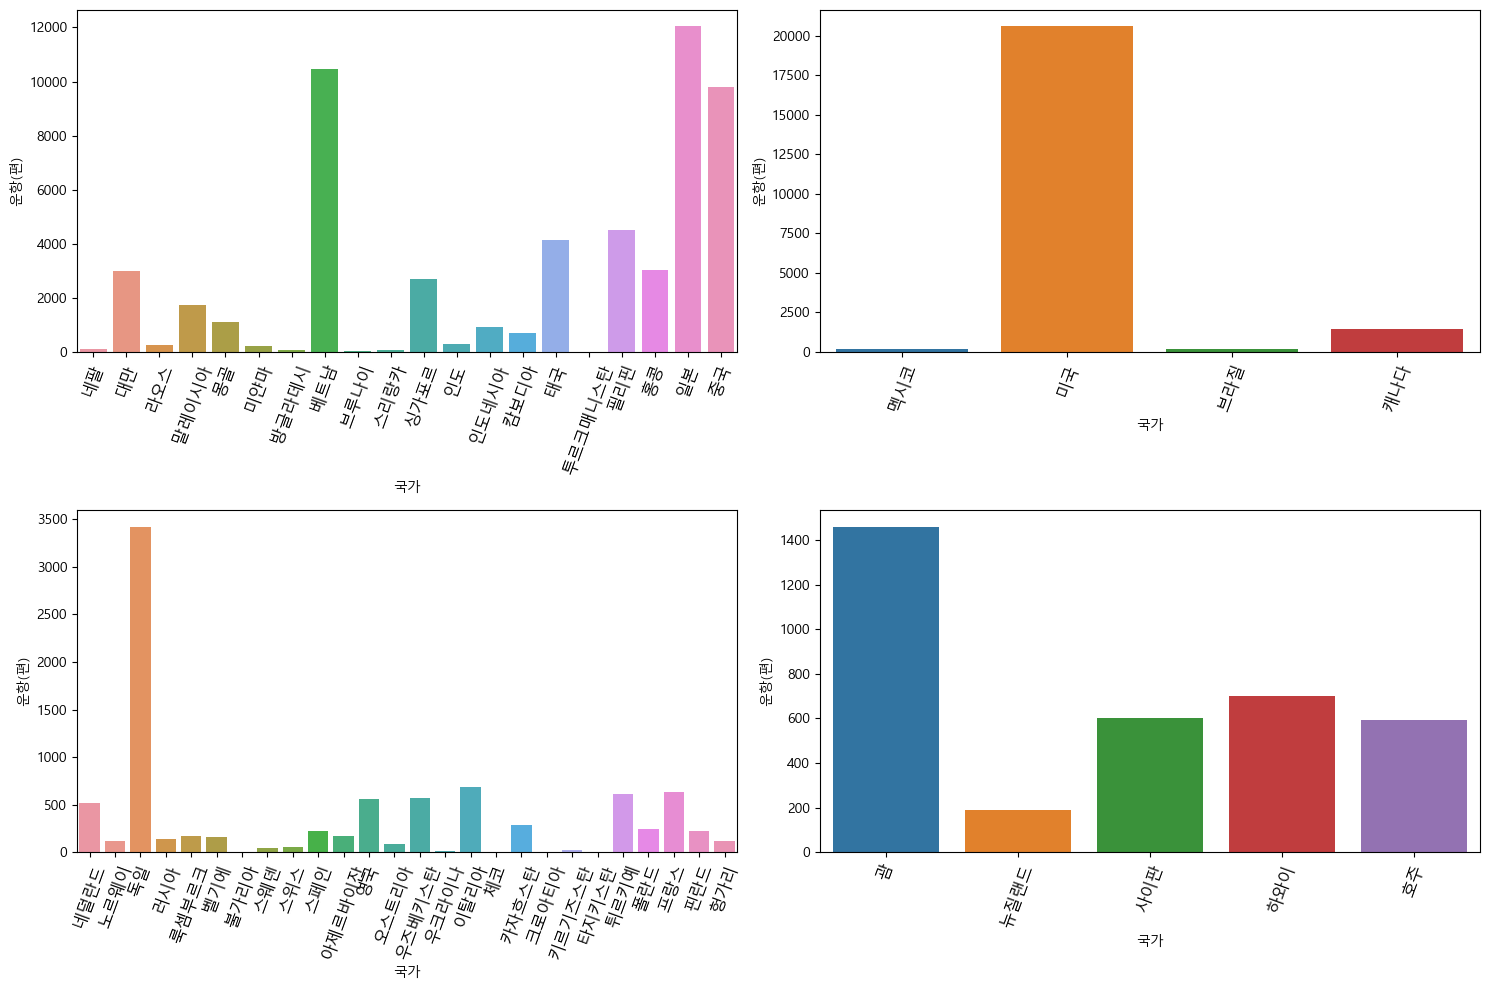

In [23]:

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
ax = sns.barplot(x="국가", y="운항(편)", data=new_data[new_data.지역 == "아시아"])

plt.subplot(2,2,2)
bx = sns.barplot(x="국가", y="운항(편)", data=new_data[new_data.지역 == "미주"])

plt.subplot(2,2,3)
cx = sns.barplot(x="국가", y="운항(편)", data=new_data[new_data.지역 == "유럽"])

plt.subplot(2,2,4)
dx = sns.barplot(x="국가", y="운항(편)", data=new_data[new_data.지역 == "대양주"])


ax.set_xticklabels(ax.get_xticklabels(),rotation = 70, fontsize = 12)
bx.set_xticklabels(bx.get_xticklabels(),rotation = 70, fontsize = 12)
cx.set_xticklabels(cx.get_xticklabels(),rotation = 70, fontsize = 12)
dx.set_xticklabels(dx.get_xticklabels(),rotation = 70, fontsize = 12)



plt.tight_layout()
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

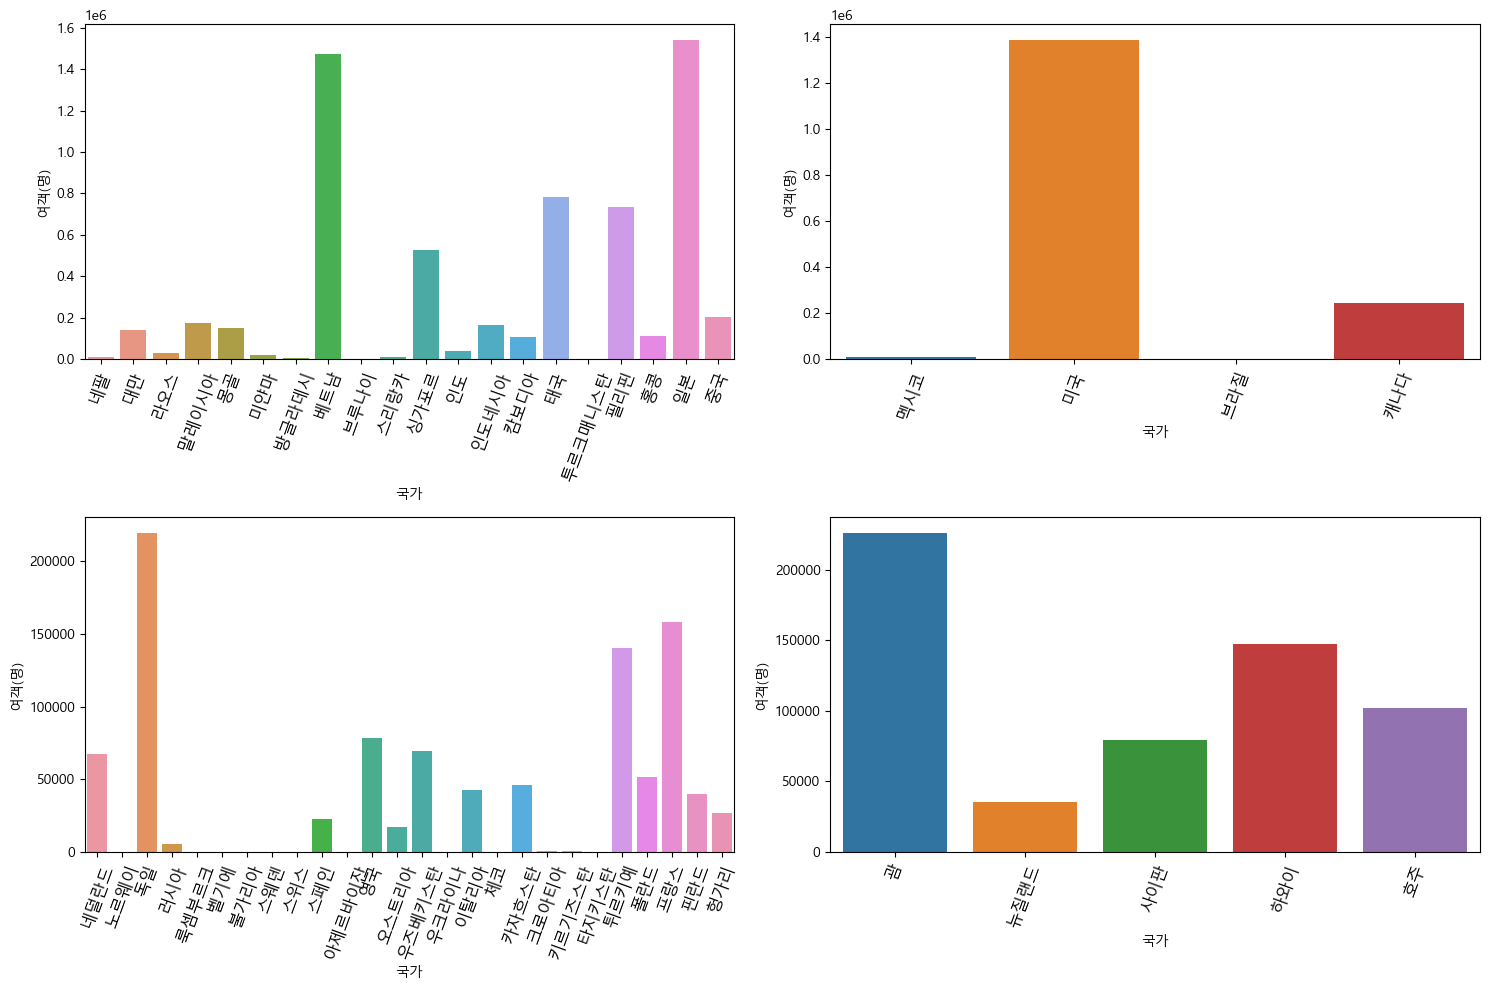

In [22]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
ax = sns.barplot(x="국가", y="여객(명)", data=new_data[new_data.지역 == "아시아"])

plt.subplot(2,2,2)
bx = sns.barplot(x="국가", y="여객(명)", data=new_data[new_data.지역 == "미주"])

plt.subplot(2,2,3)
cx = sns.barplot(x="국가", y="여객(명)", data=new_data[new_data.지역 == "유럽"])

plt.subplot(2,2,4)
dx = sns.barplot(x="국가", y="여객(명)", data=new_data[new_data.지역 == "대양주"])


ax.set_xticklabels(ax.get_xticklabels(),rotation = 70, fontsize = 12)
bx.set_xticklabels(bx.get_xticklabels(),rotation = 70, fontsize = 12)
cx.set_xticklabels(cx.get_xticklabels(),rotation = 70, fontsize = 12)
dx.set_xticklabels(dx.get_xticklabels(),rotation = 70, fontsize = 12)


#for p in ax.patches: 
#    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() + 30), 
 #      ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
  #     textcoords='offset points')



plt.tight_layout()
#plt.rcParams['font.family'] = 'Malgun Gothic'
plt.show

In [175]:
#!pip install folium

     -------------------------------------- 102.3/102.3 kB 5.8 MB/s eta 0:00:00


In [1]:
import folium
from folium import plugins

In [2]:
map = folium.Map()
map

map.save('world.html')

In [3]:
#circle
folium.CircleMarker(
    location = [32.204890,95.291089],
    radius = 50, #원 크기
    color = '#fffgg',
    fill_color = '#fffggg',
    popup = '아시아'
).add_to(map)

folium.CircleMarker(
    location = [33.347821,-84.160157],
    radius = 30, #원 크기
    color = '#fffgg',
    fill_color = '#fffggg',
    popup = '미주'
).add_to(map)

folium.CircleMarker(
    location = [56.322701,14.609031],
    radius = 20, #원 크기
    color = '#fffgg',
    fill_color = '#fffggg',
    popup = '유럽'
).add_to(map)

folium.CircleMarker(
    location = [-27.264829,148.599461],
    radius = 15, #원 크기
    color = '#fffgg',
    fill_color = '#fffggg',
    popup = '대양주'
).add_to(map)



map